In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import time
import glob

In [28]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",200)

In [29]:
os.getcwd()

'/Users/nicoroble/adtech-compe-2018-e/ml/notebook'

In [30]:
file_path = glob.glob("../../data/*")
csv_path = glob.glob("../../data/*.csv")

In [31]:
file_path

['../../data/banner_size_master.csv',
 '../../data/demogra.csv',
 '../../data/train.csv',
 '../../data/demogra_cleaned.csv',
 '../../data/banner_position_master.csv',
 '../../data/device_type_master.csv']

In [32]:
csv_path

['../../data/banner_size_master.csv',
 '../../data/demogra.csv',
 '../../data/train.csv',
 '../../data/demogra_cleaned.csv',
 '../../data/banner_position_master.csv',
 '../../data/device_type_master.csv']

# read data 

In [33]:
banner_size_master = pd.read_csv(csv_path[0])
demogra = pd.read_csv(csv_path[1])
df_train = pd.read_csv(csv_path[2])
banner_position_master = pd.read_csv(csv_path[3])
device_type_master = pd.read_csv(csv_path[4])

In [34]:
banner_size_master

,id,bannerSize
0,1,320×50
1,2,320×100
2,3,300×250
3,4,320×480


In [35]:
demogra.head()

,deviceId,age,gender,hasChild,income,isMarried
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.0,female,yes,458.0,yes
1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.0,female,no,678.0,no
2,18221f19-865b-4923-a5a9-ea13239d3aad,40.0,female,no,NaN,NaN
3,68a69f8a-a3d6-467a-832a-04f626737a81,42.0,UNKNOWN,NaN,536.0,yes
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,38.0,female,NaN,NaN,NaN


In [36]:
df_train.head()

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,6,4,1,19392.00,8abefa99-20b6-45ea-8e5b-c74081fb1fb1,608,iOS,1535203765,11,0
1,57525600-3f29-4ff9-b236-ea32fc43d78c,5,1,1,6758.20,f1e449fd-16c7-48a0-87ce-ce7f6cb1bf58,176,iOS,1535135105,6,1
2,18221f19-865b-4923-a5a9-ea13239d3aad,5,1,1,8816.15,cbe73705-bb9d-453c-b191-e1e243347beb,281,iOS,1534845969,1,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,5,3,1,9572.60,e770ef71-54a3-40be-8361-65a6128dac0e,22,ANDROID,1534931092,2,1
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,1,1,1,9793.30,923f1982-947c-4e81-9d43-b31d20c4579f,869,iOS,1535129929,15,0


In [37]:
banner_position_master

,Unnamed: 0,deviceId,age,income,female,male,not_married,married,no,yes
0,0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.000000,458.00000,1,0,0,1,0,1
1,1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.000000,678.00000,1,0,1,0,1,0
2,2,18221f19-865b-4923-a5a9-ea13239d3aad,40.000000,537.12563,1,0,0,0,1,0
3,3,68a69f8a-a3d6-467a-832a-04f626737a81,42.000000,536.00000,0,0,0,1,0,0
4,4,8b0cde1a-b024-43cf-a218-40b7abab7bde,38.000000,537.12563,1,0,0,0,0,0
5,5,3bc8db68-cd46-496d-ba5e-4b7cc6c39b69,64.000000,503.00000,0,0,0,1,0,0
6,6,ca9893cc-0337-4157-9c3e-bace3b5c80ff,47.000000,537.12563,1,0,0,1,0,0
7,7,4fc8f609-20a7-4b15-ba25-fba6a4b41e37,40.000000,536.00000,0,1,0,0,1,0
8,8,ce3ceeec-6aa5-4785-9013-88e5ced6df1c,45.500342,537.12563,0,1,0,1,1,0
9,9,bf4147d5-700e-4cae-b1ae-dc4d1c18a05c,37.000000,537.12563,1,0,0,0,0,0


In [38]:
device_type_master

,id,bannerPosition
0,1,Above the Fold
1,2,Below the Fold
2,3,Header
3,4,Footer
4,5,Sidebar
5,6,Full Screen


# check dtypes etc. 

In [39]:
print("------- demogra --------")
print("")  
print("data type:\n",demogra.dtypes)
print("")
print("number of null:\n",demogra.isnull().sum())
print("")
print("data length:\n",len(demogra))
print("")
print("u_unique:\n",demogra.nunique())

------- demogra --------

data type:
 deviceId      object
age          float64
gender        object
hasChild      object
income       float64
isMarried     object
dtype: object

number of null:
 deviceId          0
age           59935
gender            0
hasChild     225409
income       174807
isMarried    124871
dtype: int64

data length:
 500000

u_unique:
 deviceId     500000
age              65
gender            3
hasChild          2
income          419
isMarried         2
dtype: int64


In [40]:
print("------- df_train --------")
print("")  
print("data type:\n",df_train.dtypes)
print("")
print("number of null:\n",df_train.isnull().sum())
print("")
print("data length:\n",len(df_train))
print("")
print("u_unique:\n",df_train.nunique())

------- df_train --------

data type:
 deviceId           object
bannerPosition      int64
bannerSize          int64
deviceType          int64
floorPrice        float64
id                 object
mediaId             int64
osType             object
timestamp           int64
advId               int64
isClick             int64
dtype: object

number of null:
 deviceId          0
bannerPosition    0
bannerSize        0
deviceType        0
floorPrice        0
id                0
mediaId           0
osType            0
timestamp         0
advId             0
isClick           0
dtype: int64

data length:
 10000000

u_unique:
 deviceId            500000
bannerPosition           6
bannerSize               4
deviceType               1
floorPrice          386585
id                10000000
mediaId               1000
osType                   2
timestamp           604800
advId                   20
isClick                  2
dtype: int64


In [41]:
# 基本統計量
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
bannerPosition,10000000.0,3.880406e+00,1.656776,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
bannerSize,10000000.0,2.249909e+00,1.219575,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
deviceType,10000000.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
floorPrice,10000000.0,8.980794e+03,2901.756569,0.000000e+00,7.253950e+03,8.156400e+03,9.525550e+03,3.304275e+04
mediaId,10000000.0,4.994179e+02,288.674275,0.000000e+00,2.490000e+02,4.990000e+02,7.490000e+02,9.990000e+02
timestamp,10000000.0,1.535080e+09,174568.228693,1.534777e+09,1.534928e+09,1.535080e+09,1.535231e+09,1.535382e+09
advId,10000000.0,1.050292e+01,5.765755,1.000000e+00,6.000000e+00,1.100000e+01,1.600000e+01,2.000000e+01
isClick,10000000.0,2.453404e-01,0.430289,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [42]:
# 基本統計量
demogra.describe().T

,count,mean,std,min,25%,50%,75%,max
age,440065.0,45.500342,9.995720,15.0,39.0,46.0,52.0,79.0
income,325193.0,537.125630,93.662296,39.0,465.0,537.0,644.0,704.0


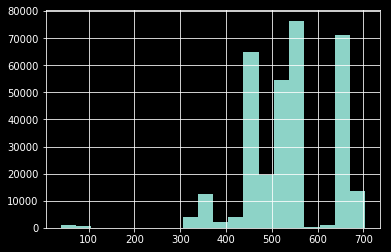

In [43]:
plt.style.use('dark_background')
demogra["income"].hist(bins=20)

# target 

(array([7546596.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 2453404.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

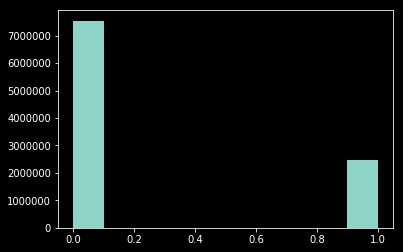

In [44]:
plt.style.use('dark_background')
plt.hist(df_train["isClick"])

In [45]:
print("非クリック・クリック比:",len(df_train[df_train["isClick"]==1])/len(df_train[df_train["isClick"]==0]))

非クリック・クリック比: 0.3251007474098256


アンダーサンプリング・オーバーサンプリング等はいらなそう！ 

# test model 

サーバーサイドとの検証用にとりあえずめっちゃ雑なモデルを作っておく 

In [46]:
df_train.head()

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,6,4,1,19392.00,8abefa99-20b6-45ea-8e5b-c74081fb1fb1,608,iOS,1535203765,11,0
1,57525600-3f29-4ff9-b236-ea32fc43d78c,5,1,1,6758.20,f1e449fd-16c7-48a0-87ce-ce7f6cb1bf58,176,iOS,1535135105,6,1
2,18221f19-865b-4923-a5a9-ea13239d3aad,5,1,1,8816.15,cbe73705-bb9d-453c-b191-e1e243347beb,281,iOS,1534845969,1,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,5,3,1,9572.60,e770ef71-54a3-40be-8361-65a6128dac0e,22,ANDROID,1534931092,2,1
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,1,1,1,9793.30,923f1982-947c-4e81-9d43-b31d20c4579f,869,iOS,1535129929,15,0


In [26]:
# from sklearn.preprocessing import LabelEncoder

# list_target = list(df_train.head(100)['isClick'].values)
# list_target[:10]
# # for target in list_target:
# #    le = LabelEncoder()
# #    le.fit(df_train[target])
# #    df_train[target] = le.transform(df_train[target])

[0, 1, 0, 1, 0, 0, 0, 1, 0, 0]

In [54]:
df_train.head()

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,6,4,1,19392.00,8abefa99-20b6-45ea-8e5b-c74081fb1fb1,608,iOS,1535203765,11,0
1,57525600-3f29-4ff9-b236-ea32fc43d78c,5,1,1,6758.20,f1e449fd-16c7-48a0-87ce-ce7f6cb1bf58,176,iOS,1535135105,6,1
2,18221f19-865b-4923-a5a9-ea13239d3aad,5,1,1,8816.15,cbe73705-bb9d-453c-b191-e1e243347beb,281,iOS,1534845969,1,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,5,3,1,9572.60,e770ef71-54a3-40be-8361-65a6128dac0e,22,ANDROID,1534931092,2,1
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,1,1,1,9793.30,923f1982-947c-4e81-9d43-b31d20c4579f,869,iOS,1535129929,15,0


In [22]:
#X_train = df_train.drop(["id","isClick"],axis=1).values
#y_train = df_train["advId"].values

In [23]:
# ランダムフォレスト
#from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(random_state=0, n_estimators=10)
#rfc.fit(X_train, y_train)

In [24]:
# 訓練精度
#print('train acc: %.3f' % rfc.score(X_train, y_train))

In [25]:
# confusion matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_train, rfc.predict(X_train))

In [26]:
#def plot_cm(confmat):
#    fig, ax = plt.subplots(figsize=(5, 5))
#    ax.matshow(confmat, cmap=plt.cm.RdYlGn, alpha=10)
#    for i in range(confmat.shape[0]):
#        for j in range(confmat.shape[1]):
#            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
#    plt.title('predicted label')
#    plt.ylabel('true label')
#    plt.tight_layout() 
#    plt.show()

In [27]:
#plot_cm(cm)

# preprocess 

## df_train

・ToDo:

①"bannerPosition"をone-hot-encoding。

②"deviceType"をone-hot-encoding。

③"mediaId"を（少ないカテゴリをothersにまとめて）one-hot-encodingやcount-encodingなどに変換。

④"osType"をone-hot-encoding。

⑤"timestamp"を時間帯で区分して（午前・午後・深夜等）one-hot-encoding?

⑥"advId"をone-hot-encoding。

In [28]:
#①"bannerPosition"をone-hot-encoding。

In [93]:
df_train["bannerPosition"] = df_train["bannerPosition"].astype("str")

In [96]:
df_train["bannerPosition"].value_counts()

5    2400933
6    1999625
4    1601972
3    1598426
1    1199614
2    1199430
Name: bannerPosition, dtype: int64

In [97]:
banner_posi_dummies = pd.get_dummies(df_train["bannerPosition"])

In [98]:
banner_posi_dummies.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,1,0,0,0,0,0


In [100]:
banner_posi_dummies = banner_posi_dummies.drop(["1"],axis=1) # 多重共線性を避けるためにカラムを１つdrop
banner_posi_dummies = banner_posi_dummies.rename(columns={"2":"bannerPosition_below","3":"bannerPosition_header","4":"bannerPosition_footer",
                                    "5":"bannerPosition_Sidebar","6":"bannerPosition_Full"})

In [101]:
banner_posi_dummies.head()

,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,0,0


In [32]:
#②"deviceType"をone-hot-encoding。

In [102]:
df_train["deviceType"].value_counts()

1    10000000
Name: deviceType, dtype: int64

まさかの全部Mobile→"deviceType"は変数からはずす

In [34]:
#③"mediaId"を（少ないカテゴリをothersにまとめて）one-hot-encodingやcount-encodingなどに変換。

In [103]:
df_train["mediaId"] = df_train["mediaId"].astype("str")

In [104]:
df_train["mediaId"].value_counts()

607    10304
258    10301
762    10286
332    10272
367    10270
844    10264
970    10246
651    10244
211    10243
734    10241
690    10225
994    10223
348    10212
744    10206
737    10206
238    10203
498    10202
799    10199
404    10197
839    10196
745    10185
354    10184
380    10183
226    10180
161    10178
166    10178
459    10176
881    10176
55     10175
803    10174
456    10174
723    10173
378    10172
29     10171
462    10171
19     10167
419    10167
795    10165
625    10164
413    10164
159    10163
50     10163
503    10161
954    10160
277    10160
677    10159
611    10158
681    10157
656    10156
550    10155
291    10154
955    10154
169    10153
676    10153
294    10153
216    10152
874    10152
197    10150
150    10150
320    10149
901    10149
491    10149
62     10148
629    10146
772    10146
47     10145
940    10145
700    10145
760    10145
426    10145
383    10145
364    10144
692    10144
899    10143
153    10142
507    10141
634    10140

In [105]:
mediaId_dummies = pd.get_dummies(df_train["mediaId"])

In [106]:
mediaId_dummies.head()

,0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,197,198,199,2,20,200,201,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,231,232,233,234,235,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,25,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,29,290,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,305,306,307,308,309,31,310,311,312,313,314,315,316,317,318,319,32,320,321,322,323,324,325,326,327,328,329,33,330,331,332,333,334,335,336,337,338,339,34,340,341,342,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,367,368,369,37,370,371,372,373,374,375,376,377,378,379,38,380,381,382,383,384,385,386,387,388,389,39,390,391,392,393,394,395,396,397,398,399,4,40,400,401,402,403,404,405,406,407,408,409,41,410,411,412,413,414,415,416,417,418,419,42,420,421,422,423,424,425,426,427,428,429,43,430,431,432,433,434,435,436,437,438,439,44,440,441,442,443,444,445,446,447,448,449,45,450,451,452,453,454,455,456,457,458,459,46,460,461,462,463,464,465,466,467,468,469,47,470,471,472,473,474,475,476,477,478,479,48,480,481,482,483,484,485,486,487,488,489,49,490,491,492,493,494,495,496,497,498,499,5,50,500,501,502,503,504,505,506,507,508,509,51,510,511,512,513,514,515,516,517,518,519,52,520,521,522,523,524,525,526,527,528,529,53,530,531,532,533,534,535,536,537,538,539,54,540,541,542,543,544,545,546,547,548,549,55,550,551,552,553,554,555,556,557,558,559,56,560,561,562,563,564,565,566,567,568,569,57,570,571,572,573,574,575,576,577,578,579,58,580,581,582,583,584,585,586,587,588,589,59,590,591,592,593,594,595,596,597,598,599,6,60,600,601,602,603,604,605,606,607,608,609,61,610,611,612,613,614,615,616,617,618,619,62,620,621,622,623,624,625,626,627,628,629,63,630,631,632,633,634,635,636,637,638,639,64,640,641,642,643,644,645,646,647,648,649,65,650,651,652,653,654,655,656,657,658,659,66,660,661,662,663,664,665,666,667,668,669,67,670,671,672,673,674,675,676,677,678,679,68,680,681,682,683,684,685,686,687,688,689,69,690,691,692,693,694,695,696,697,698,699,7,70,700,701,702,703,704,705,706,707,708,709,71,710,711,712,713,714,715,716,717,718,719,72,720,721,722,723,724,725,726,727,728,729,73,730,731,732,733,734,735,736,737,738,739,74,740,741,742,743,744,745,746,747,748,749,75,750,751,752,753,754,755,756,757,758,759,76,760,761,762,763,764,765,766,767,768,769,77,770,771,772,773,774,775,776,777,778,779,78,780,781,782,783,784,785,786,787,788,789,79,790,791,792,793,794,795,796,797,798,799,8,80,800,801,802,803,804,805,806,807,808,809,81,810,811,812,813,814,815,816,817,818,819,82,820,821,822,823,824,825,826,827,828,829,83,830,831,832,833,834,835,836,837,838,839,84,840,841,842,843,844,845,846,847,848,849,85,850,851,852,853,854,855,856,857,858,859,86,860,861,862,863,864,865,866,867,868,869,87,870,871,872,873,874,875,876,877,878,879,88,880,881,882,883,884,885,886,887,888,889,89,890,891,892,893,894,895,896,897,898,899,9,90,900,901,902,903,904,905,906,907,908,909,91,910,911,912,913,914,915,916,917,918,919,92,920,921,922,923,924,925,926,927,928,929,93,930,931,932,933,934,935,936,937,938,939,94,940,941,942,943,944,945,946,947,948,949,95,950,951,952,953,954,955,956,957,958,959,96,960,961,962,963,964,965,966,967,968,969,97,970,971,972,973,974,975,976,977,978,979,98,980,981,982,983,984,985,986,987,988,989,99,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [108]:
mediaId_columns = []
for i in list(mediaId_dummies.columns):
    new_col = "mediaId_" + str(i)
    mediaId_columns.append(new_col)

In [109]:
mediaId_dummies.columns = mediaId_columns

In [112]:
mediaId_dummies = mediaId_dummies.drop(["mediaId_0"],axis=1) # 多重共線性を避けるためにカラムを１つdrop

In [113]:
mediaId_dummies.head()

,mediaId_1,mediaId_10,mediaId_100,mediaId_101,mediaId_102,mediaId_103,mediaId_104,mediaId_105,mediaId_106,mediaId_107,mediaId_108,mediaId_109,mediaId_11,mediaId_110,mediaId_111,mediaId_112,mediaId_113,mediaId_114,mediaId_115,mediaId_116,mediaId_117,mediaId_118,mediaId_119,mediaId_12,mediaId_120,mediaId_121,mediaId_122,mediaId_123,mediaId_124,mediaId_125,mediaId_126,mediaId_127,mediaId_128,mediaId_129,mediaId_13,mediaId_130,mediaId_131,mediaId_132,mediaId_133,mediaId_134,mediaId_135,mediaId_136,mediaId_137,mediaId_138,mediaId_139,mediaId_14,mediaId_140,mediaId_141,mediaId_142,mediaId_143,mediaId_144,mediaId_145,mediaId_146,mediaId_147,mediaId_148,mediaId_149,mediaId_15,mediaId_150,mediaId_151,mediaId_152,mediaId_153,mediaId_154,mediaId_155,mediaId_156,mediaId_157,mediaId_158,mediaId_159,mediaId_16,mediaId_160,mediaId_161,mediaId_162,mediaId_163,mediaId_164,mediaId_165,mediaId_166,mediaId_167,mediaId_168,mediaId_169,mediaId_17,mediaId_170,mediaId_171,mediaId_172,mediaId_173,mediaId_174,mediaId_175,mediaId_176,mediaId_177,mediaId_178,mediaId_179,mediaId_18,mediaId_180,mediaId_181,mediaId_182,mediaId_183,mediaId_184,mediaId_185,mediaId_186,mediaId_187,mediaId_188,mediaId_189,mediaId_19,mediaId_190,mediaId_191,mediaId_192,mediaId_193,mediaId_194,mediaId_195,mediaId_196,mediaId_197,mediaId_198,mediaId_199,mediaId_2,mediaId_20,mediaId_200,mediaId_201,mediaId_202,mediaId_203,mediaId_204,mediaId_205,mediaId_206,mediaId_207,mediaId_208,mediaId_209,mediaId_21,mediaId_210,mediaId_211,mediaId_212,mediaId_213,mediaId_214,mediaId_215,mediaId_216,mediaId_217,mediaId_218,mediaId_219,mediaId_22,mediaId_220,mediaId_221,mediaId_222,mediaId_223,mediaId_224,mediaId_225,mediaId_226,mediaId_227,mediaId_228,mediaId_229,mediaId_23,mediaId_230,mediaId_231,mediaId_232,mediaId_233,mediaId_234,mediaId_235,mediaId_236,mediaId_237,mediaId_238,mediaId_239,mediaId_24,mediaId_240,mediaId_241,mediaId_242,mediaId_243,mediaId_244,mediaId_245,mediaId_246,mediaId_247,mediaId_248,mediaId_249,mediaId_25,mediaId_250,mediaId_251,mediaId_252,mediaId_253,mediaId_254,mediaId_255,mediaId_256,mediaId_257,mediaId_258,mediaId_259,mediaId_26,mediaId_260,mediaId_261,mediaId_262,mediaId_263,mediaId_264,mediaId_265,mediaId_266,mediaId_267,mediaId_268,mediaId_269,mediaId_27,mediaId_270,mediaId_271,mediaId_272,mediaId_273,mediaId_274,mediaId_275,mediaId_276,mediaId_277,mediaId_278,mediaId_279,mediaId_28,mediaId_280,mediaId_281,mediaId_282,mediaId_283,mediaId_284,mediaId_285,mediaId_286,mediaId_287,mediaId_288,mediaId_289,mediaId_29,mediaId_290,mediaId_291,mediaId_292,mediaId_293,mediaId_294,mediaId_295,mediaId_296,mediaId_297,mediaId_298,mediaId_299,mediaId_3,mediaId_30,mediaId_300,mediaId_301,mediaId_302,mediaId_303,mediaId_304,mediaId_305,mediaId_306,mediaId_307,mediaId_308,mediaId_309,mediaId_31,mediaId_310,mediaId_311,mediaId_312,mediaId_313,mediaId_314,mediaId_315,mediaId_316,mediaId_317,mediaId_318,mediaId_319,mediaId_32,mediaId_320,mediaId_321,mediaId_322,mediaId_323,mediaId_324,mediaId_325,mediaId_326,mediaId_327,mediaId_328,mediaId_329,mediaId_33,mediaId_330,mediaId_331,mediaId_332,mediaId_333,mediaId_334,mediaId_335,mediaId_336,mediaId_337,mediaId_338,mediaId_339,mediaId_34,mediaId_340,mediaId_341,mediaId_342,mediaId_343,mediaId_344,mediaId_345,mediaId_346,mediaId_347,mediaId_348,mediaId_349,mediaId_35,mediaId_350,mediaId_351,mediaId_352,mediaId_353,mediaId_354,mediaId_355,mediaId_356,mediaId_357,mediaId_358,mediaId_359,mediaId_36,mediaId_360,mediaId_361,mediaId_362,mediaId_363,mediaId_364,mediaId_365,mediaId_366,mediaId_367,mediaId_368,mediaId_369,mediaId_37,mediaId_370,mediaId_371,mediaId_372,mediaId_373,mediaId_374,mediaId_375,mediaId_376,mediaId_377,mediaId_378,mediaId_379,mediaId_38,mediaId_380,mediaId_381,mediaId_382,mediaId_383,mediaId_384,mediaId_385,mediaId_386,mediaId_387,mediaId_388,mediaId_389,mediaId_39,mediaId_390,mediaId_391,mediaId_392,mediaId_393,mediaId_394,mediaId_395,mediaId_396,mediaId_397,mediaId_398,mediaId_399,mediaId_4,mediaId_40,mediaId_400,mediaI

In [36]:
#④"osType"をone-hot-encoding。

In [119]:
df_train["osType"].value_counts()

iOS        6500846
ANDROID    3499154
Name: osType, dtype: int64

In [120]:
os_type_dummies = pd.get_dummies(df_train["osType"])
os_type_dummies = os_type_dummies.drop(["ANDROID"],axis=1)
os_type_dummies = os_type_dummies.rename(columns={"iOS":"os_type_iOS"})

In [121]:
os_type_dummies.head()

,os_type_iOS
0,1
1,1
2,1
3,0
4,1


In [39]:
#⑤"timestamp"から時・曜日を抽出してそれぞれ変数として持たせる

In [141]:
import datetime
list_timestamp_int = list(df_train["timestamp"])

#"timestamp":int to timestamp
list_timestamp = []
for i in range(len(list_timestamp_int)):
    list_timestamp.append(datetime.datetime.fromtimestamp(list_timestamp_int[i]))

In [142]:
list_timestamp

[datetime.datetime(2018, 8, 25, 22, 29, 25),
 datetime.datetime(2018, 8, 25, 3, 25, 5),
 datetime.datetime(2018, 8, 21, 19, 6, 9),
 datetime.datetime(2018, 8, 22, 18, 44, 52),
 datetime.datetime(2018, 8, 25, 1, 58, 49),
 datetime.datetime(2018, 8, 22, 15, 23),
 datetime.datetime(2018, 8, 25, 14, 39, 4),
 datetime.datetime(2018, 8, 21, 4, 8, 44),
 datetime.datetime(2018, 8, 24, 17, 4, 23),
 datetime.datetime(2018, 8, 24, 8, 30, 39),
 datetime.datetime(2018, 8, 22, 7, 0, 42),
 datetime.datetime(2018, 8, 25, 3, 13, 44),
 datetime.datetime(2018, 8, 27, 17, 49, 1),
 datetime.datetime(2018, 8, 27, 17, 26, 53),
 datetime.datetime(2018, 8, 22, 12, 2, 49),
 datetime.datetime(2018, 8, 25, 4, 35, 12),
 datetime.datetime(2018, 8, 21, 10, 13, 19),
 datetime.datetime(2018, 8, 23, 3, 15, 14),
 datetime.datetime(2018, 8, 21, 6, 32, 26),
 datetime.datetime(2018, 8, 26, 11, 36, 29),
 datetime.datetime(2018, 8, 26, 9, 34, 19),
 datetime.datetime(2018, 8, 21, 4, 25, 8),
 datetime.datetime(2018, 8, 23, 9, 

In [143]:
# 時・曜日を抽出
list_hour = []
list_weekday = []# 0~4:月~金。5~6:土~日
for i in range(len(list_timestamp)):
    list_hour.append(list_timestamp[i].hour)
    list_weekday.append(list_timestamp[i].weekday())

In [144]:
df_train["hour"] = list_hour
df_train["weekday"] = list_weekday

In [145]:
df_train["hour"].value_counts()

7     417467
0     417424
11    417415
18    417353
23    417167
6     417133
17    416977
4     416825
19    416818
21    416775
22    416719
14    416688
13    416604
2     416601
5     416568
12    416561
1     416548
15    416538
10    416462
9     416199
20    416140
8     415731
16    415663
3     415624
Name: hour, dtype: int64

In [146]:
df_train["hour"] = df_train["hour"].astype("str")

In [155]:
hour_dummies = pd.get_dummies(df_train["hour"])

In [156]:
hour_dummies.head()

,0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
hour_columns = []
for i in list(hour_dummies.columns):
    new_col = "h_" + str(i)
    hour_columns.append(new_col)

In [158]:
hour_dummies.columns = hour_columns

In [159]:
hour_dummies = hour_dummies.drop(["h_0"],axis=1)

In [160]:
hour_dummies.head()

,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [161]:
# 休日フラグ
weekday_mapping = {0:0,1:0,2:0,3:0,4:0,5:1,6:1}
df_train["weekday"] = df_train["weekday"].map(weekday_mapping)
df_train = df_train.rename(columns={"weekday":"isHoliday"})

In [162]:
df_train.head()

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick,hour,isHoliday
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,6,4,1,19392.00,8abefa99-20b6-45ea-8e5b-c74081fb1fb1,608,iOS,1535203765,11,0,22,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,5,1,1,6758.20,f1e449fd-16c7-48a0-87ce-ce7f6cb1bf58,176,iOS,1535135105,6,1,3,1
2,18221f19-865b-4923-a5a9-ea13239d3aad,5,1,1,8816.15,cbe73705-bb9d-453c-b191-e1e243347beb,281,iOS,1534845969,1,0,19,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,5,3,1,9572.60,e770ef71-54a3-40be-8361-65a6128dac0e,22,ANDROID,1534931092,2,1,18,0
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,1,1,1,9793.30,923f1982-947c-4e81-9d43-b31d20c4579f,869,iOS,1535129929,15,0,1,1


In [48]:
#⑥"advId"をone-hot-encoding。

In [163]:
df_train["advId"] = df_train["advId"].astype("str")

In [164]:
df_train["advId"].value_counts()

20    501545
12    500926
13    500673
6     500439
17    500407
11    500246
15    500245
8     500221
14    500000
7     499916
16    499912
3     499845
9     499822
18    499777
4     499754
1     499714
10    499448
5     499247
19    499040
2     498823
Name: advId, dtype: int64

In [165]:
ad_id_dummies = pd.get_dummies(df_train["advId"])

In [166]:
ad_id_dummies.head()

,1,10,11,12,13,14,15,16,17,18,19,2,20,3,4,5,6,7,8,9
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [167]:
ad_id_columns = []
for i in list(ad_id_dummies.columns):
    new_col = "advId_" + str(i)
    ad_id_columns.append(new_col)

In [168]:
ad_id_dummies.columns = ad_id_columns

In [170]:
ad_id_dummies = ad_id_dummies.drop(["advId_1"],axis=1)

In [171]:
ad_id_dummies.head()

,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


・作った変数：df_train

・banner_posi_dummies

・mediaId_dummies

・os_type_dummies

・hour_dummies

・isHoliday（既にmerge済）

・ad_id_dummies

## demogra

・ToDo:

①"age"を平均値補完。

②"gender"をone-hot-encoding。

③"hasChild"をone-hot-encoding。

④"income"を平均値補完。

⑤"isMarried"をone-hot-encoding。

## merge

・ToDo:

①前処理後のdf_trainとdemograをdeviceIdをキーにしてmerge。

②標準化する。